##########################################################################################
# TEST NNexplainer for Regression model
##########################################################################################

In [1]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import sys

In [2]:
# import NNexplainer library
sys.path.append('C:/Users/user/tmp/')              # folder for 'explain_NN.py' 
from explain_NN import NNexplainer

In [3]:
# Read Boston housing dataset
data_url = 'https://github.com/selva86/datasets/raw/refs/heads/master/BostonHousing.csv'

boston = pd.read_csv(data_url)
y = boston['medv']
X = boston.drop('medv', axis=1)    # drop the target variable
feature_names = X.columns.to_list()
y = y.to_numpy()

In [4]:
# split dataset
X_train_org, X_test_org, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [5]:
# Scale data to 0 ~ 1 
# which is importance for convergence of the neural network
scaler = MinMaxScaler()                 
scaler.fit(X_train_org)

MinMaxScaler()

In [6]:
# number of features (variables)
n_features = X.shape[1]

In [7]:
# create a NNexplainer object
eNN = NNexplainer(random_state=5, scaler=scaler)

In [8]:
# Build a regression model
# 'layers' parameters contaions node# of hidden layers and output layer 
params = {'lr': 0.05, 'batch_size': 25, 'epochs': 40, 'layers': [16, 8, 1], 'feature_names': feature_names}
disp = eNN.build_NN(X_train_org, y_train, params)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 458.4173 - mae: 18.3787 - val_loss: 116.7121 - val_mae: 8.5209
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.0285 - mae: 8.3175 - val_loss: 69.2972 - val_mae: 6.6307
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.8153 - mae: 6.3871 - val_loss: 48.1243 - val_mae: 4.3837
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.0794 - mae: 5.4089 - val_loss: 41.9164 - val_mae: 4.1309
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.7285 - mae: 4.8982 - val_loss: 37.1393 - val_mae: 4.1150
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.1448 - mae: 4.5893 - val_loss: 31.7661 - val_mae: 3.7154
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.7425 - mae: 4.2513 - val_loss: 26.6192 - val_mae: 3.2145
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.4068 - mae: 3.9413 - val_loss: 24.4612 - val_mae: 3.1307
Epoch 9/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [9]:
print(eNN._model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,109 (4.34 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 740 (2.89 KB)

None


In [10]:
# model performance
score = eNN._model.evaluate(scaler.transform(X_test_org), y_test, verbose=0)
print('Test loss:', score[0])
print('Test mae:', score[1])

Test loss: 9.12806224822998
Test mae: 2.326887369155884


In [11]:
# Explain a prediction
idx=0
input_org = X_test_org.iloc[idx,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[-3.67837577e-02 -2.01387882e-01  5.42416051e-01  0.00000000e+00
 -2.73993908e+00  7.16676703e+01 -1.30496380e+01 -1.03322630e+01
  3.57122959e-01 -4.21857131e+00 -2.49808296e+01  2.06120727e+01
 -8.56095221e+00]


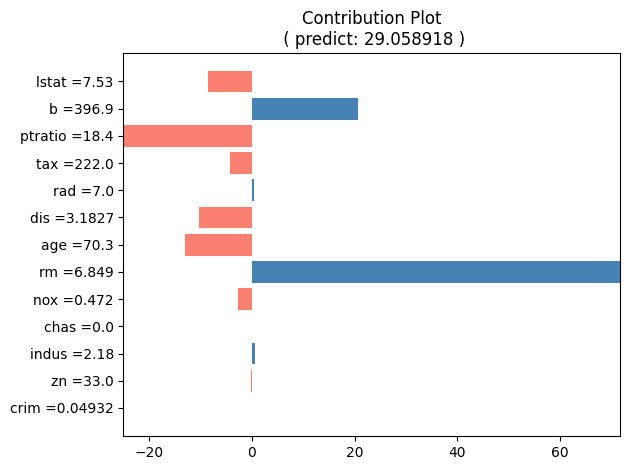

In [12]:
# contribution plot for input_org
con_list = eNN.plot_contribution_R(input_org)  

In [15]:
print(con_list)

crim       -0.036784
zn         -0.201388
indus       0.542416
chas        0.000000
nox        -2.739939
rm         71.667670
age       -13.049638
dis       -10.332263
rad         0.357123
tax        -4.218571
ptratio   -24.980830
b          20.612073
lstat      -8.560952
dtype: float64


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[-3.67837577e-02 -2.01387882e-01  5.42416051e-01  0.00000000e+00
 -2.73993908e+00  7.16676703e+01 -1.30496380e+01 -1.03322630e+01
  3.57122959e-01 -4.21857131e+00 -2.49808296e+01  2.06120727e+01
 -8.56095221e+00]


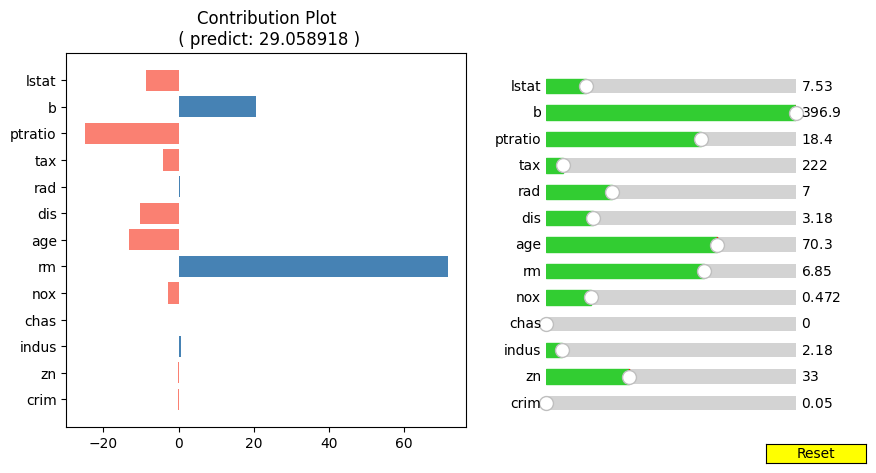

In [13]:
# interactive contribution plot for input_org
con_list = eNN.plot_contribution_interactive_R(input_org)

In [16]:
print(con_list)

crim       -0.036784
zn         -0.201388
indus       0.542416
chas        0.000000
nox        -2.739939
rm         71.667670
age       -13.049638
dis       -10.332263
rad         0.357123
tax        -4.218571
ptratio   -24.980830
b          20.612073
lstat      -8.560952
dtype: float64


Permutation test.....


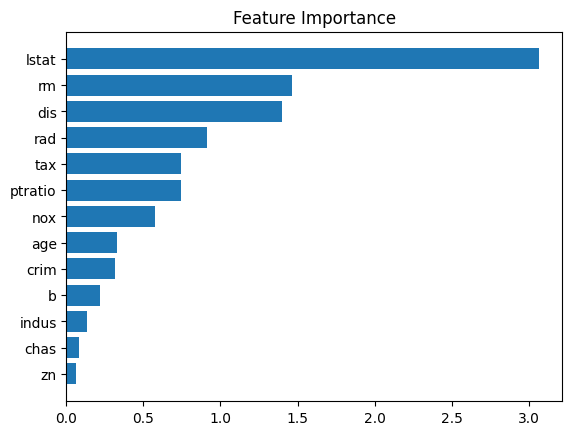

In [14]:
# feature importance plot
eNN.plot_feature_importance(X_train_org, y_train)

In [ ]:
# In the feature importance plot, 'lstat' is 3.0
# If the influnece of 'lstat' is removed, the prediction error 'mae' increases by 3.0.